<a href="https://colab.research.google.com/github/Ivonne-Rojas/Simulation-of-Different-Age-Distributions-for-the-Analysis-of-the-Aging-Curve-of-a-Population-of-S./blob/main/Experimental_growth_curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import collections as coll 
import random  
import openpyxl 
from openpyxl import load_workbook # 
from time import time  
from timeit import timeit 
from scipy.interpolate import interp1d 	
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression 

In [ ]:
# These are the experimental data taken from Slipstreaming Mother Machine: A Microfluidic Device for
# Single-Cell Dynamic Imaging of Yeast

tiempo=[12,13,14,15,16,17,18,19,20,21]# units are in hours 
OD=[0.0993333333333333,0.147666666666667,0.203,0.273,0.382333333333333,0.484333333333333,0.723333333333333,0.780333333333333,0.977666666666667,1.035]

Ntiempo=np.array(tiempo)
NOD=np.array(OD)

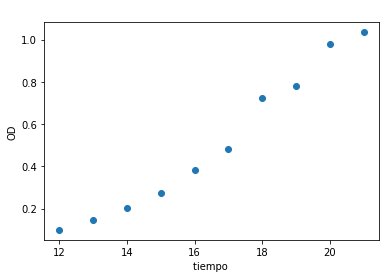

In [ ]:
plt.scatter(tiempo, OD)
plt.xlabel('tiempo ')
plt.ylabel('OD')
plt.title(' ')
plt.show()  

popt [  4.59444493  -0.44174255 -20.78453977   1.33100546] pcov [[-2.62758049e+14 -1.25317594e+05  1.29465405e+14  1.74014999e+06]
 [-1.25317689e+05  2.35869773e-03  6.17461490e+04  6.72013144e-03]
 [ 1.29465405e+14  6.17461032e+04 -6.37898297e+13 -8.57401874e+05]
 [ 1.74014972e+06  6.72013066e-03 -8.57401747e+05  6.38105451e-03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


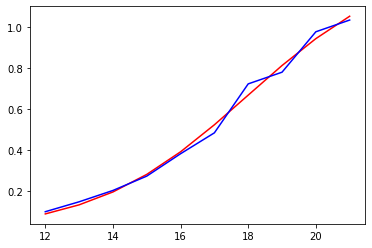

In [ ]:
#fit 
def fsigmoid(x,a,b,c,k):
  return k*a*np.exp(-b*(x+c))/ (k + a*np.exp(-b*(x+c)))#Model used for the logistic growth model 
#k load capacity, a initial population, b growth rate,c parameter  
xdata = np.linspace(0, 35, 35)
ydata = np.random.normal(size=len(xdata))
popt, pcov = curve_fit(fsigmoid, Ntiempo, NOD)
a=curve_fit(fsigmoid,Ntiempo,NOD)
print('popt',popt,'pcov', pcov)
plt.figure()
plt.plot(Ntiempo, fsigmoid(Ntiempo, *popt), 'r-', label='fit')
#plt.plot(x,y)
plt.plot(Ntiempo, NOD, 'b-', label='data')
plt.show()

In [ ]:
ylist=[]
for i in xdata:
  y=fsigmoid(i,popt[0],popt[1],popt[2],popt[3])
  ylist.append(y)

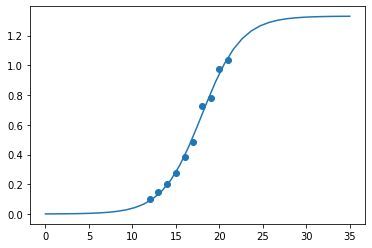

In [ ]:
plt.plot(xdata,ylist)
plt.scatter(tiempo, OD)
plt.show()

In [ ]:
#takes the logarithm of OD
LogOD=[]
for i in range(len(ylist)):
  lo=np.log(ylist[i])
  LogOD.append(lo)
print(LogOD)

[-7.656922953966313, -7.202392455297504, -6.7479796033581305, -6.293752008267394, -5.839816021127283, -5.386338764854502, -4.933582445836636, -4.48195742892182, -4.032103447468883, -3.5850117049965227, -3.142203285444806, -2.7059776657878474, -2.279730977628602, -1.8683018073846644, -1.4782143088020754, -1.1175575572169572, -0.7951523221542723, -0.5188242919619459, -0.29319544548367465, -0.11809416532987654, 0.011382036910487758, 0.1031950383443445, 0.16616100950246557, 0.20827976321687772, 0.23595946443841545, 0.2539313498469828, 0.2655064354487856, 0.27292227928804697, 0.2776571788725249, 0.2806736926931848, 0.28259275144440216, 0.28381253003817986, 0.2845873936416688, 0.28507944618732955, 0.28539183629685216]


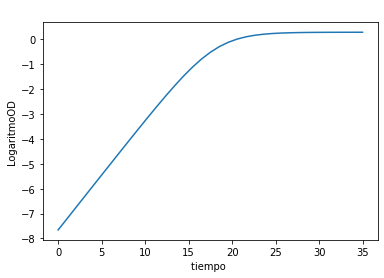

In [ ]:
#graph of logarithm of OD verus time 
plt.plot(xdata, LogOD)
plt.xlabel('tiempo ')
plt.ylabel('LogaritmoOD')
plt.title(' ')
plt.show() 

In [ ]:
#calculates the slope of the graph of the logarithm of OD vs time
pendientes=[]
for i in range(len(LogOD)-1):
  y=LogOD[i+1]-LogOD[i]
  x=xdata[i+1]-xdata[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(len(pendientes))

[0.44154391299255696, 0.44142962759824883, 0.44124966380242947, 0.44096638750753686, 0.440520763236416, 0.4398204241887836, 0.43872144500296434, 0.4370010105542823, 0.4343176926874354, 0.4301567504216678, 0.4237620305239026, 0.4140682113546957, 0.3996740510941107, 0.3789421414802294, 0.3503522729684006, 0.3131936569180367, 0.2684329436154024, 0.2191823080074639, 0.1700983864351185, 0.1257768821763537, 0.08918977282146069, 0.06116694341074629, 0.040915360751143305, 0.026888852615208042, 0.01745840296832253, 0.011244368870322754, 0.007203962586711049, 0.00459961673920712, 0.0029303277114982105, 0.001864228501182562, 0.0011849277768126235, 0.0007527246433892548, 0.00047799390149902264, 0.0003034646778219625]
34


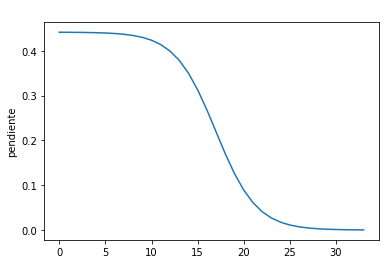

In [ ]:
plt.plot(pendientes)
plt.xlabel(' ')
plt.ylabel('pendiente')
plt.title(' ')
plt.show() 

In [ ]:
#caculate the change of the slope per centual 
deltapen=[]
for i in range(len(pendientes)-1):
  de=((pendientes[i+1]-pendientes[i])/pendientes[i])*100
  deltapen.append(de)
print(deltapen)
print(len(deltapen))
print(xdata)

[-0.025883132106513704, -0.040768399891623855, -0.06419864265765127, -0.10105628994528859, -0.15897980437678907, -0.2498699754214996, -0.39214733363909404, -0.6140301285444237, -0.9580411610728758, -1.4866022424375918, -2.2875619972894508, -3.476277546999323, -5.187204312395942, -7.544652700845214, -10.606072492561044, -14.291704928860764, -18.347463222883096, -22.394107452629775, -26.056393119090863, -29.088898310894407, -31.419330405527834, -33.108704686468, -34.2817657682349, -35.07196748719487, -35.593370764066194, -35.9327084535224, -36.151573750647934, -36.29191566070917, -36.381569410561795, -36.4387050159907, -36.47506133968487, -36.49817291130739, -36.51285573513054]
33
[ 0.          1.02941176  2.05882353  3.08823529  4.11764706  5.14705882
  6.17647059  7.20588235  8.23529412  9.26470588 10.29411765 11.32352941
 12.35294118 13.38235294 14.41176471 15.44117647 16.47058824 17.5
 18.52941176 19.55882353 20.58823529 21.61764706 22.64705882 23.67647059
 24.70588235 25.73529412 26

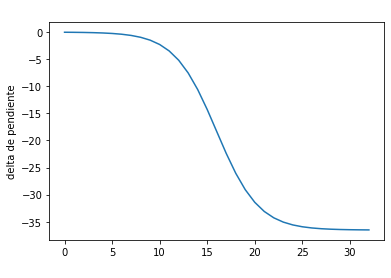

In [ ]:
plt.plot(deltapen)
plt.xlabel(' ')
plt.ylabel('delta de pendiente')
plt.title(' ')
plt.show() 



---



---

